<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/My%20HW/MiniP2/MiniP2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import numpy , matplotlib and seaborn

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# 1.3- Read Data

In [ ]:
!gdown 1LARn0Boq62ijLSCKYnogBeCtLe2K5xZL
company_data = pd.read_csv('Company_Data.csv')
company_data.head(10)


Downloading...
From: https://drive.google.com/uc?id=1LARn0Boq62ijLSCKYnogBeCtLe2K5xZL
To: /content/Company_Data.csv
100% 16.6k/16.6k [00:00<00:00, 32.6MB/s]


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


# 2.3- Pre Processing

In [ ]:
#Checking for missing values
company_data.isnull().sum()


,0
Sales,0
CompPrice,0
Income,0
Advertising,0
Population,0
Price,0
ShelveLoc,0
Age,0
Education,0
Urban,0


In [ ]:
# Removing rows with missing values
company_data = company_data.dropna()

In [ ]:
# Finding Duplicates
num_duplicates = company_data.duplicated().sum()
company_data = company_data.drop_duplicates()
print(f"Number Of Duplicate Rows:{num_duplicates}")

Number Of Duplicate Rows:0


In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

label_encoder = LabelEncoder()
# "One-Hot Encoding" Used for "Urban" and "US". since they dont have an inherent order (nominal features)
#using Label Encoding can mislead the model into assuming an order where there isn't one. This can
#potentially affect model performance negatively.
company_data = pd.get_dummies(company_data, columns=['Urban', 'US'], drop_first=True)

#"LabelEncoder" can be Used for Shelveloc since it can be efficient and work well for features with an inherent order (natural ranking)
# company_data['ShelveLoc'] = label_encoder.fit_transform(company_data['ShelveLoc'])
# but This code by default orders the classes alphabetically, not by any intrinsic “goodness”, Thus:
#*** Models like Decision Trees or Random Forests don’t really care much about numerical order — they just split based on feature values.
#But models like Linear Regression, Logistic Regression, SVM, or anything that assumes numeric relationships will think "Good" (1) is between Bad (0) and Medium (2) — which is wrong.
#Another Fix:
#order_map = {'Bad': 0, 'Medium': 1, 'Good': 2}
#company_data['ShelveLoc'] = company_data['ShelveLoc'].map(order_map)


#Ordinal Encoder Is
ord_enc = OrdinalEncoder(categories=[['Bad', 'Medium', 'Good']])
company_data[['ShelveLoc']] = ord_enc.fit_transform(company_data[['ShelveLoc']])
#or
#company_data[['ShelveLoc']] = ord_enc.fit_transform(company_data[['ShelveLoc']]).astype(int)  for integer instead of float

In [ ]:
company_data.dtypes

,0
Sales,float64
CompPrice,int64
Income,int64
Advertising,int64
Population,int64
Price,int64
ShelveLoc,float64
Age,int64
Education,int64
Urban_Yes,bool


In [ ]:
# Just Making Sure Urban_YES and US_YES are int (so that we dont run into errors during training)
company_data[['Urban_Yes', 'US_Yes']] = company_data[['Urban_Yes', 'US_Yes']].astype(int)
company_data.dtypes

,0
Sales,float64
CompPrice,int64
Income,int64
Advertising,int64
Population,int64
Price,int64
ShelveLoc,float64
Age,int64
Education,int64
Urban_Yes,int64


In [ ]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0.0,42,17,1,1
1,11.22,111,48,16,260,83,2.0,65,10,1,1
2,10.06,113,35,10,269,80,1.0,59,12,1,1
3,7.40,117,100,4,466,97,1.0,55,14,1,1
4,4.15,141,64,3,340,128,0.0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2.0,33,14,1,1
396,6.14,139,23,3,37,120,1.0,55,11,0,1
397,7.41,162,26,12,368,159,1.0,40,18,1,1
398,5.94,100,79,7,284,95,0.0,50,12,1,1


In [ ]:
#Using Mean as the Threshold
company_data['Sales'].mean(),(company_data['Sales'] > company_data['Sales'].mean()).sum(),(company_data['Sales'] <= company_data['Sales'].mean()).sum()

(np.float64(7.496325000000001), np.int64(199), np.int64(201))

In [ ]:
#Using Kmean Clustering as Threshold
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=52)
new_df = pd.DataFrame(kmeans.fit_predict(company_data[['Sales']]))
print(kmeans.cluster_centers_),new_df.value_counts()

[[11.6265    ]
 [ 7.97235955]
 [ 4.57274648]]


(None,
 0
 1    178
 2    142
 0     80
 Name: count, dtype: int64)

In [ ]:
# Calculate thresholds using quantiles
thresholds = np.quantile(company_data['Sales'], [0.33, 0.67])
thresholds,company_data['Sales'].nlargest(5)
#8.68 is far from 11.62 which is the 3rd Mean cluster value and is not a good representetive of outliers such as 16.27

(array([6.03  , 8.6833]),
 376    16.27
 316    15.63
 25     14.90
 367    14.37
 18     13.91
 Name: Sales, dtype: float64)

In [ ]:
# Based On the 3 methods used Above, Mean is the best threshold since the Classes would be More balanced
company_data['Sales_Categorical'] = pd.cut(company_data['Sales'],
                                         bins=[-np.inf, company_data['Sales'].mean(), np.inf],
                                         labels=['Low', 'High'])

#Reorginizing DataFrame for Better Look

#Removing Sales column and replacing it with "Sales_Category"
company_data = company_data.drop('Sales', axis=1)

#company_data = company_data[['Sales_Categorical'] + [col for col in company_data.columns if col != 'Sales_Categorical']] *** or the following:
company_data = pd.concat([company_data[['Sales_Categorical']], company_data[[col for col in company_data.columns if col != 'Sales_Categorical']]], axis=1)


company_data

,Sales_Categorical,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,High,138,73,11,276,120,0.0,42,17,1,1
1,High,111,48,16,260,83,2.0,65,10,1,1
2,High,113,35,10,269,80,1.0,59,12,1,1
3,Low,117,100,4,466,97,1.0,55,14,1,1
4,Low,141,64,3,340,128,0.0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,2.0,33,14,1,1
396,Low,139,23,3,37,120,1.0,55,11,0,1
397,Low,162,26,12,368,159,1.0,40,18,1,1
398,Low,100,79,7,284,95,0.0,50,12,1,1


In [ ]:
company_data = pd.get_dummies(company_data, columns=['Sales_Categorical'], drop_first=True).astype(int)
company_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,Sales_Categorical_High
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,2,65,10,1,1,1
2,113,35,10,269,80,1,59,12,1,1,1
3,117,100,4,466,97,1,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1,1
396,139,23,3,37,120,1,55,11,0,1,0
397,162,26,12,368,159,1,40,18,1,1,0
398,100,79,7,284,95,0,50,12,1,1,0


In [ ]:
company_data["Sales_Categorical"]=company_data["Sales_Categorical_High"]
company_data = company_data.drop(['Sales_Categorical_High'], axis=1)
company_data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,Sales_Categorical
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,2,65,10,1,1,1
2,113,35,10,269,80,1,59,12,1,1,1
3,117,100,4,466,97,1,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1,1
396,139,23,3,37,120,1,55,11,0,1,0
397,162,26,12,368,159,1,40,18,1,1,0
398,100,79,7,284,95,0,50,12,1,1,0


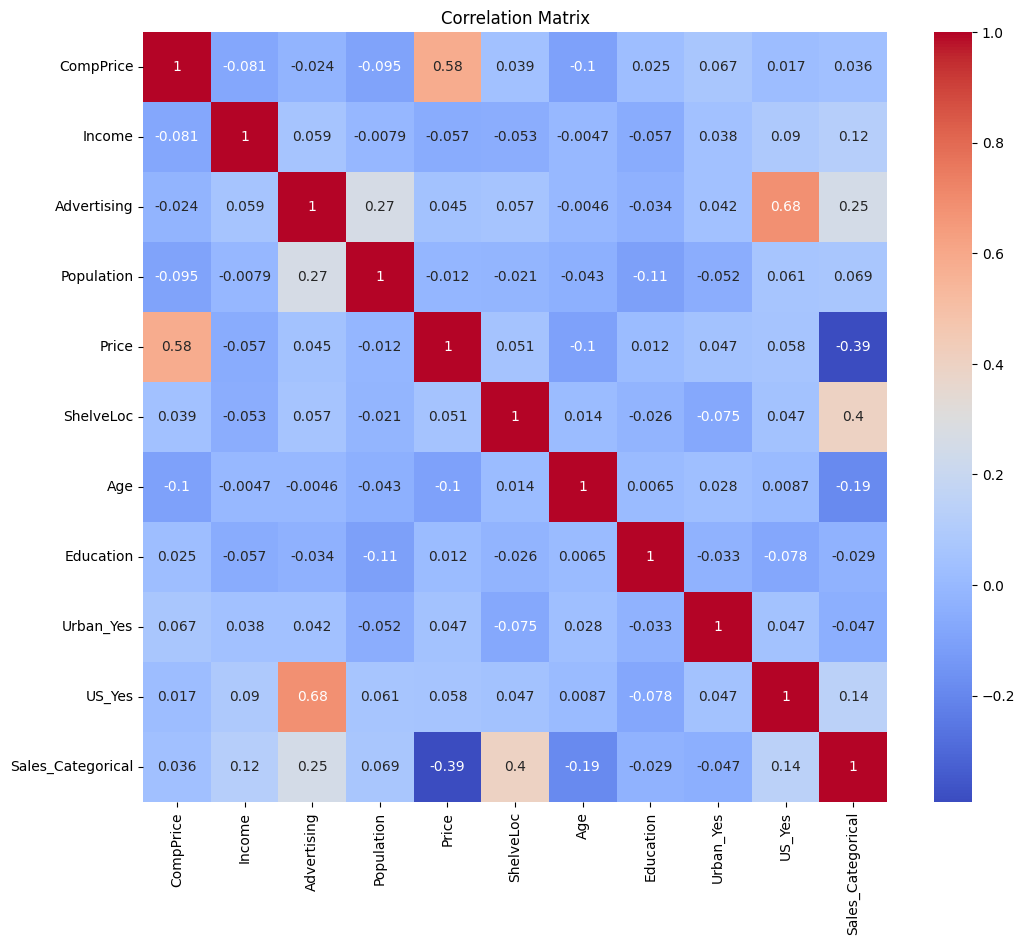

In [ ]:
correlation_matrix = company_data.corr()
# ترسیم heatmap
plt.figure(figsize=(12, 10))  # تنظیم اندازه شکل
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

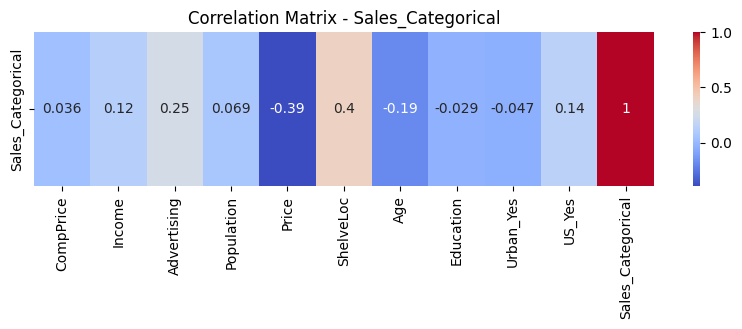

In [ ]:
plt.figure(figsize=(10, 2))
sns.heatmap(correlation_matrix[['Sales_Categorical']].T, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix - Sales_Categorical')
plt.show()
#.T is used to show plot horizontally

In [ ]:
target='Sales_Categorical'
threshold=0.2
Highcors = correlation_matrix[target][abs(correlation_matrix[target]) > threshold].index.tolist() #Choosing Features with Corr>0.2
Highcors.remove('Sales_Categorical')
Highcors

['Advertising', 'Price', 'ShelveLoc']

# 3.3-Entropy Calculation

In [ ]:
def calculate_entropy(labels):
  p=labels.value_counts()/len(labels)
  return -sum(p*np.log2(p))

In [ ]:
calculate_entropy(company_data['Sales_Categorical'])

0.9999819662368479

# 4.3-Information Gain

In [ ]:
def info_gain(data, child, parent):
    # Entropy of parent
    entropy_parent = calculate_entropy(data[parent])

    # Entropy of child
    entropy_child = 0
    for value in data[child].unique():
        subset = data[data[child] == value]
        wi = len(subset) / len(data)
        entropy_child += wi * calculate_entropy(subset[parent])

    return entropy_parent - entropy_child

In [ ]:
info_gain(company_data, 'ShelveLoc', 'Sales_Categorical')

0.12802289274162826

#5.3- Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X = company_data.drop(columns=['Sales_Categorical'])
y = company_data['Sales_Categorical']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=56)

In [ ]:
dt = DecisionTreeClassifier(random_state=56)
param_grid = {
    'criterion':        ['gini', 'entropy'],        # measure for split quality
    'max_depth':        [1, 3, 5, 7, 10],        # tree depth
    'min_samples_split':[2, 5, 10, 20],             # min samples to split a node
    'min_samples_leaf': [1, 2, 4, 8],               # min samples in a leaf
    'max_features':     ['sqrt', 'log2'],      # number of features to consider at each split
    'ccp_alpha':        [0.0, 0.01, 0.05, 0.1, 0.5]  # Cost-complexity pruning parameter

}

In [ ]:
grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='accuracy',    # use 'f1_weighted' if class‐imbalance is an issue
    cv=8,                  # 5-fold cross-validation
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 8 folds for each of 1600 candidates, totalling 12800 fits


GridSearchCV(cv=8, estimator=DecisionTreeClassifier(random_state=56),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.05, 0.1, 0.5],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy', verbose=1)

In [ ]:
print("Best params found:\n", grid.best_params_)
print(f"Best CV accuracy: {grid.best_score_:.4f}")

Best params found:
 {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 2}
Best CV accuracy: 0.7594


In [ ]:
best_dt = grid.best_estimator_
y_pred = best_dt.predict(X_test)

In [ ]:
print(best_dt.classes_)

[0 1]


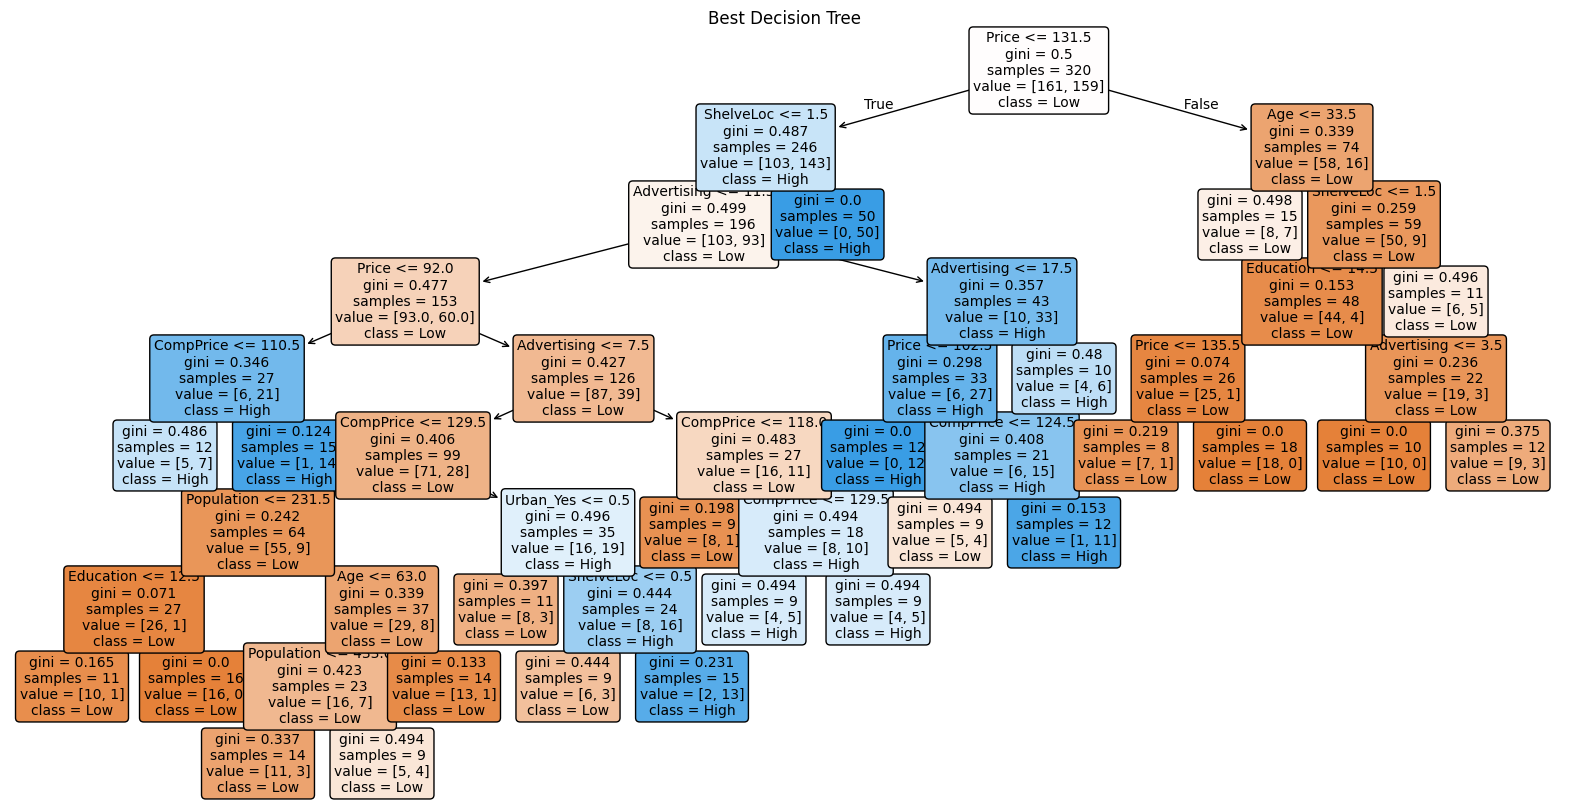

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt,
    feature_names=X.columns,
    class_names=['Low' if c == 0 else 'High' for c in best_dt.classes_],   #since class names were transformed to int but need to be str
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Best Decision Tree")
plt.show()

In [ ]:
#Checking for overfitting and underfitting

# Predict on training and test sets
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Test Accuracy:     {test_accuracy:.3f}")

# Simple diagnostic
if train_accuracy > 0.95 and (train_accuracy - test_accuracy) > 0.1:
    print("\n Possible Overfitting: Model performs very well on training data but poorly on test data.")
elif train_accuracy < 0.7 and test_accuracy < 0.7:
    print("\n Possible Underfitting: Model does not perform well on either training or test data.")
else:
    print("\n Model seems to be generalizing well.")

Training Accuracy: 0.822
Test Accuracy:     0.738

 Model seems to be generalizing well.


In [ ]:
print("\nTest set performance:")
print(classification_report(y_test, y_pred, target_names=['Low' if c == 0 else 'High' for c in best_dt.classes_]))  #its possible not to write target_names
print("Test accuracy: ", accuracy_score(y_test, y_pred))


Test set performance:
              precision    recall  f1-score   support

         Low       0.74      0.72      0.73        40
        High       0.73      0.75      0.74        40

    accuracy                           0.74        80
   macro avg       0.74      0.74      0.74        80
weighted avg       0.74      0.74      0.74        80

Test accuracy:  0.7375


<Figure size 600x500 with 0 Axes>

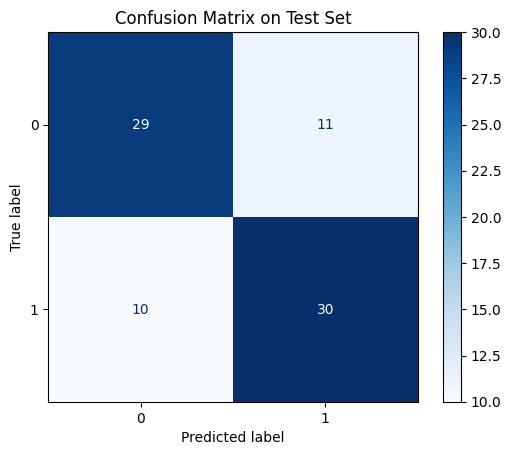

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=best_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)

plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix on Test Set")
plt.show()